<h2 style="color:purple" align="center">Tensorboard demo using handwritten digits classification using neural network</h2>

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

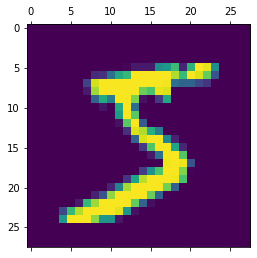

In [6]:
plt.matshow(X_train[0])

In [7]:
y_train[0]

5

In [8]:
X_train = X_train / 255
X_test = X_test / 255

In [9]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [10]:
X_train_flattened.shape

(60000, 784)

<h3 style='color:purple'>Using Flatten layer so that we don't have to call .reshape on input dataset</h3>

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)

model.fit(X_train, y_train, epochs=5, callbacks=[tb_callback])

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4429 - accuracy: 0.8765
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1267 - accuracy: 0.9622
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0874 - accuracy: 0.9747
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0626 - accuracy: 0.9806
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0479 - accuracy: 0.9857


In [12]:
%load_ext tensorboard
%tensorboard --logdir logs/fit

ERROR: Timed out waiting for TensorBoard to start. It may still be running as pid 7620.

Either run above inline magic or go to git bash or your command prompt and type below to run it,
`tensorboard --logdir logs/`
This will launch tensorboard at this url which you can open in your browser `http://localhost:6006/`

In [13]:
model.get_weights()

[array([[ 0.05410022, -0.05473149,  0.07052943, ...,  0.00580491,
          0.0373878 , -0.04356142],
        [-0.01767403, -0.05590218,  0.06639823, ...,  0.05637379,
         -0.05848894,  0.07249638],
        [-0.0008209 ,  0.07337613, -0.06564323, ...,  0.03681409,
          0.01173023,  0.02313933],
        ...,
        [-0.04291668, -0.00669385, -0.00659105, ...,  0.0124644 ,
         -0.01464676,  0.05729976],
        [ 0.03699069,  0.0219618 ,  0.06876557, ..., -0.07725386,
          0.04579735,  0.0403335 ],
        [-0.05578402, -0.00063688,  0.06570473, ...,  0.00400584,
         -0.05583177,  0.04109966]], dtype=float32),
 array([ 0.06734024, -0.11067656,  0.02475394, -0.00277614, -0.02490881,
         0.1683903 ,  0.17505676, -0.08149912,  0.0522631 ,  0.04603459,
         0.09470804, -0.09369934,  0.02929701,  0.06804639,  0.14579497,
         0.068047  ,  0.10476591, -0.0285513 ,  0.03915178,  0.04704826,
         0.11354975,  0.08335172,  0.05800908, -0.11152551,  0.032